# 题目

本笔记包含力扣题目 [167.两数之和II-输入有序数组](https://leetcode.cn/problems/two-sum-ii-input-array-is-sorted/) 的求解动画演示代码。

### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://zjl9959.github.io/algviz/) 渲染，环境配置请参考该链接：[https://zjl9959.github.io/algviz/cn/installation.html](https://zjl9959.github.io/algviz/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

# 思路

两数之和的变种，由于题目中限制了`只使用常量级的额外空间`，所以哈希表的方案是行不通了。先试试暴力求解会不会超时！

In [1]:
import algviz

class Solution:
  def twoSum(self, numbers, target):
    viz = algviz.Visualizer()
    numbers = viz.createVector(numbers, 'numbers')
    viz.display()
    i = viz.createCursor(0, 'i')
    j = viz.createCursor(1, 'j')
    while i < len(numbers):
      while j < len(numbers):
        if numbers[i] + numbers[j] == target:
          numbers.mark(algviz.color_green, i)
          numbers.mark(algviz.color_green, j)
          viz.display()
          return [i.index(), j.index()]
        j += 1
        viz.display()
      i += 1; j << i + 1
      viz.display()
    return [None, None]

numbers:

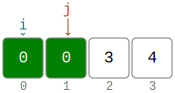

[0, 1]

In [2]:
numbers = [0, 0, 3, 4]
target = 0
Solution().twoSum(numbers, target)

**果不其然，上面的代码超时了，让我们对代码进行优化。**

由于输入序列是有序的，可以考虑用二分查找。

In [3]:
import algviz

class Solution:
  def twoSum(self, numbers, target):
    viz = algviz.Visualizer()
    numbers = viz.createVector(numbers, 'numbers')
    log = viz.createLogger(1, show_line_num=False)
    viz.display()
    i = viz.createCursor(0, 'i')
    l = viz.createCursor(i + 1, 'l')
    r = viz.createCursor(len(numbers)-1, 'r')
    while i < len(numbers):
      l << i + 1
      r << len(numbers) - 1
      numbers[i];numbers[l]; numbers[r]
      log.write('当前二分搜索查找目标：{}'.format(target - numbers[i]))
      viz.display()
      while l <= r:
        mid = (l + r) // 2
        numbers.mark(algviz.color_red, mid)
        viz.display()
        if numbers[mid] < target - numbers[i]:
          l << mid + 1
        elif numbers[mid] > target - numbers[i]:
          r << mid - 1
        else:
          numbers.mark(algviz.color_green, i)
          numbers.mark(algviz.color_green, mid)
          viz.display()
          return [i.index(), mid]
        viz.display()
      i += 1
      viz.display()
    return [None, None]

numbers:

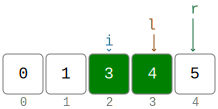

[2, 3]

In [5]:
numbers = [0, 1, 3, 4, 5]
target = 7
Solution().twoSum(numbers, target)

最终顺利通过！